In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import rfft,rfftfreq,irfft

In [32]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "Cuarentena/"
files = np.sort(glob.glob(folder+'*.txt'))

In [33]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationData.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

<IPython.core.display.Javascript object>


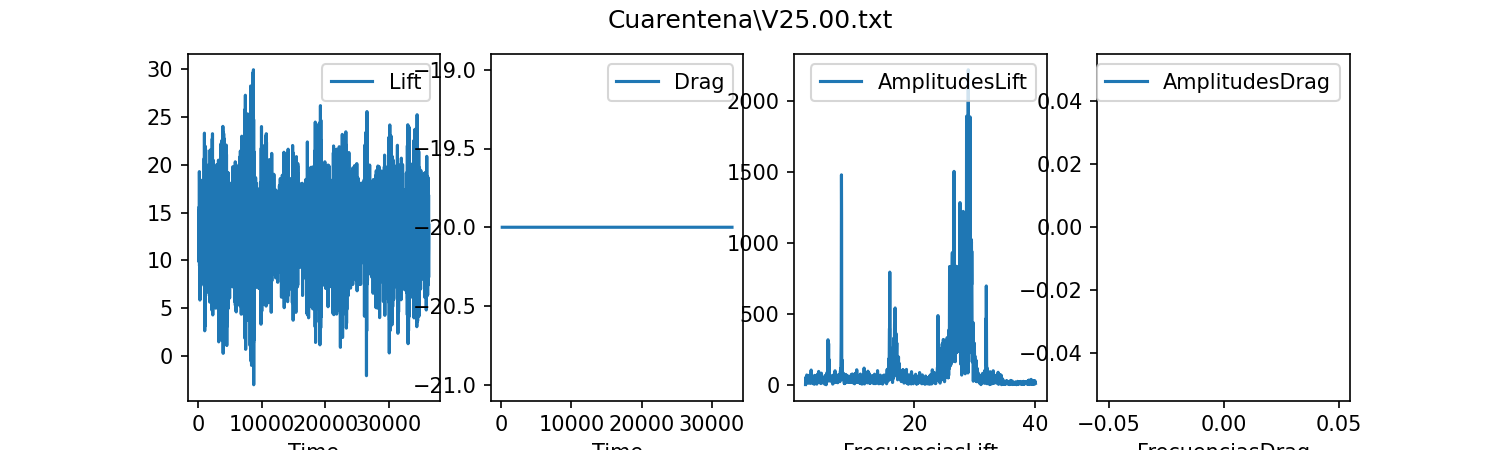

<IPython.core.display.Javascript object>


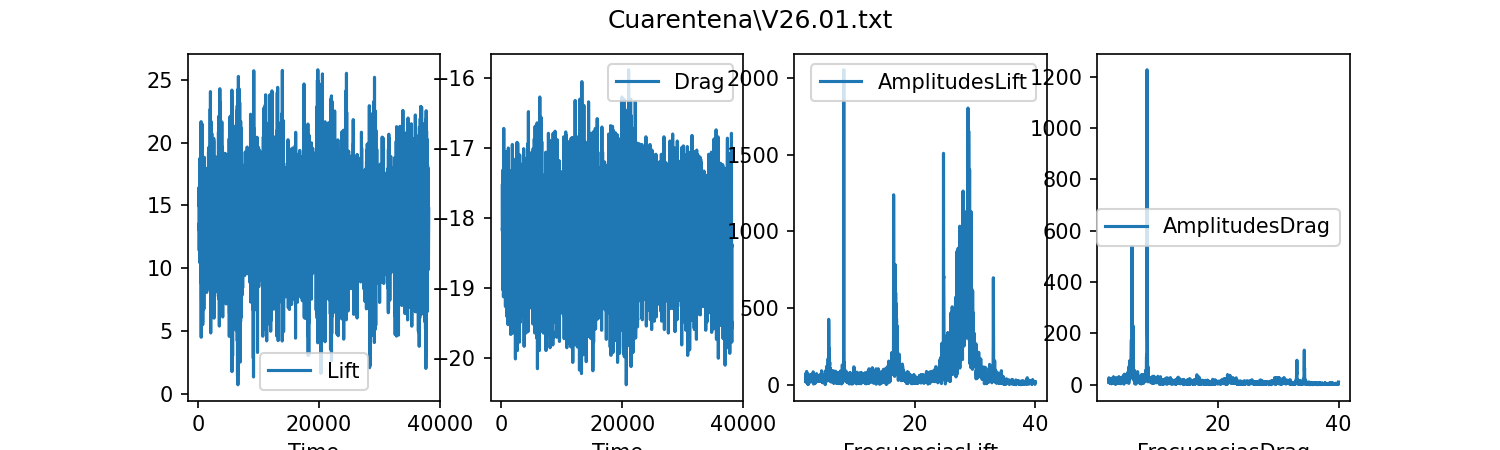

<IPython.core.display.Javascript object>


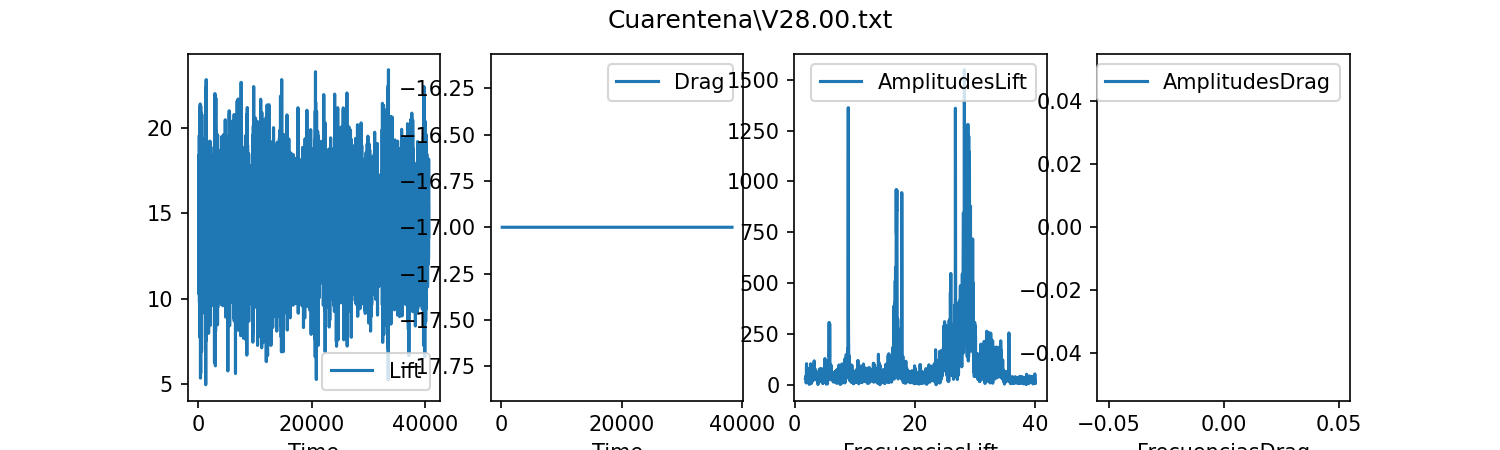

<IPython.core.display.Javascript object>


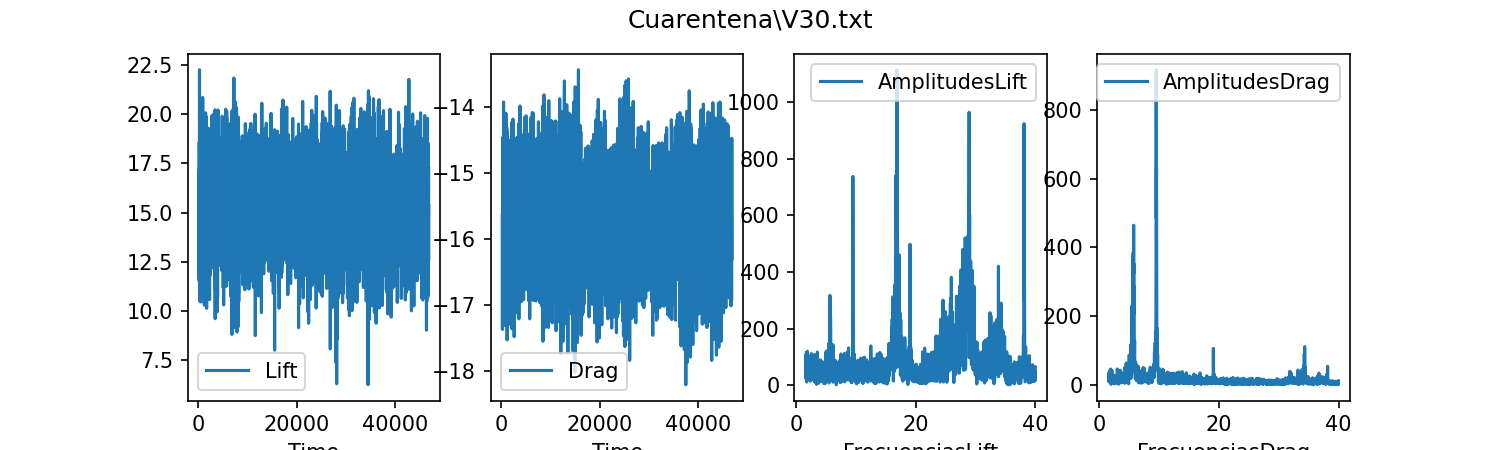

<IPython.core.display.Javascript object>


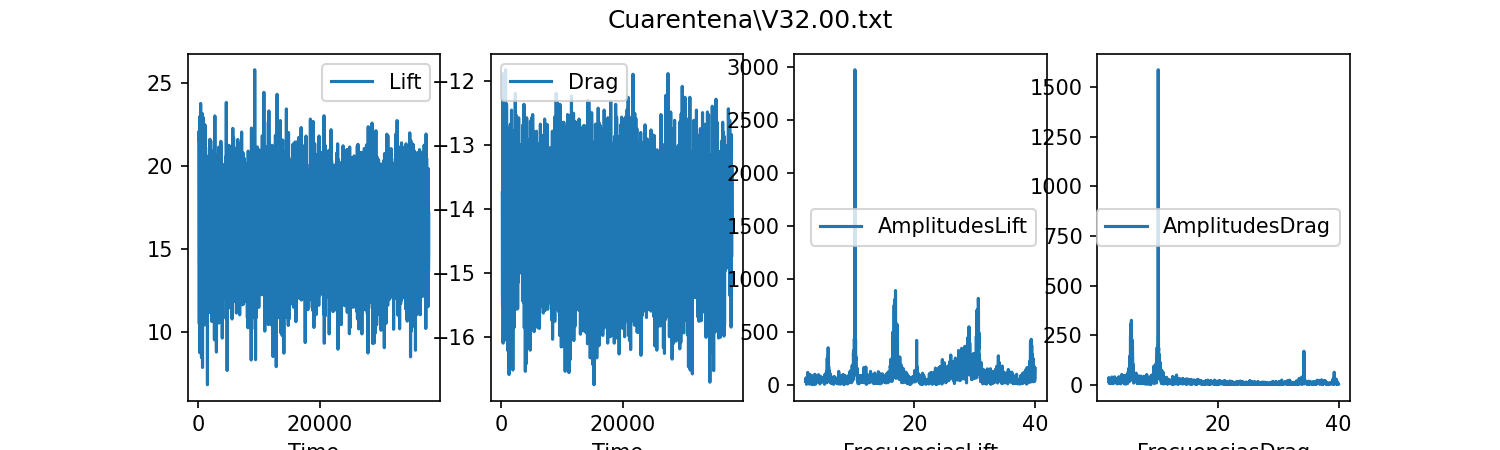

C:\Users\Santi\AppData\Local\Temp\ipykernel_15536\3102014805.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))


<IPython.core.display.Javascript object>


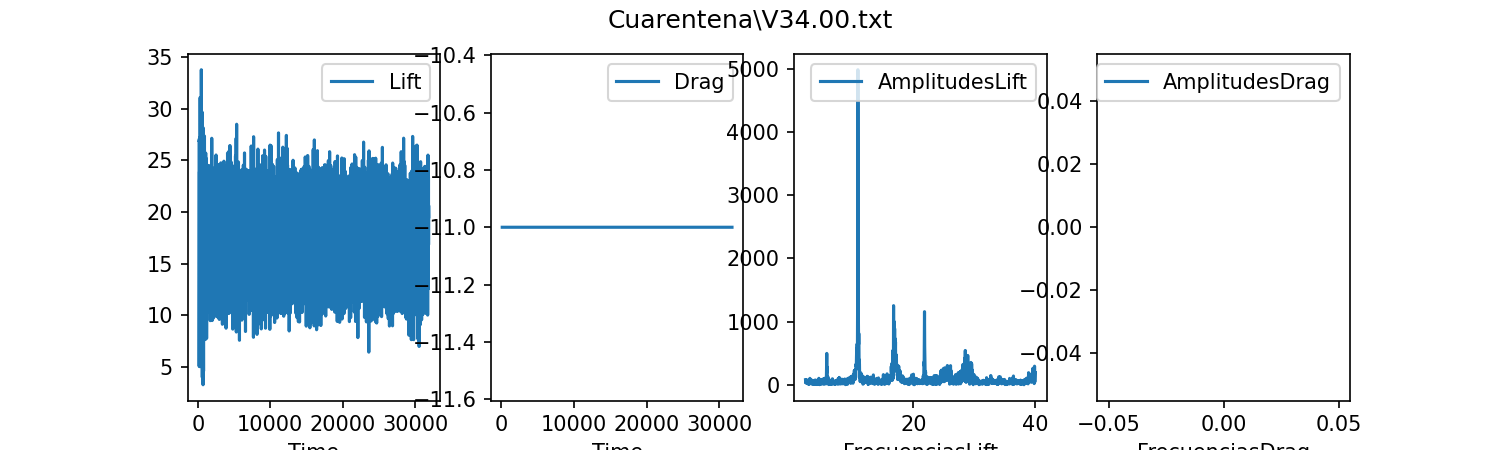

<IPython.core.display.Javascript object>


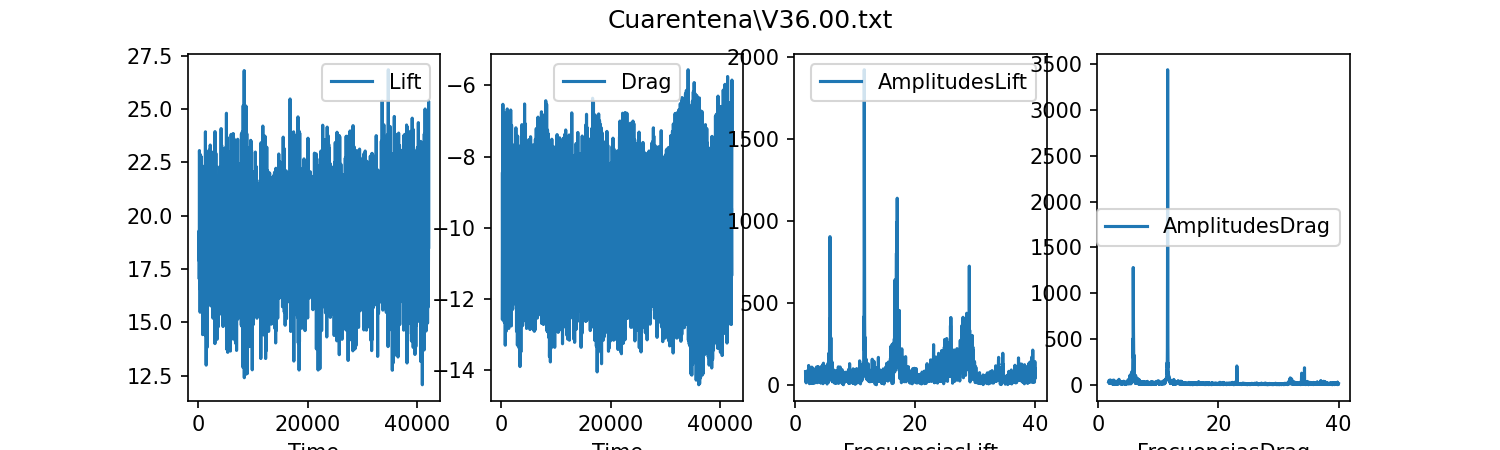

<IPython.core.display.Javascript object>


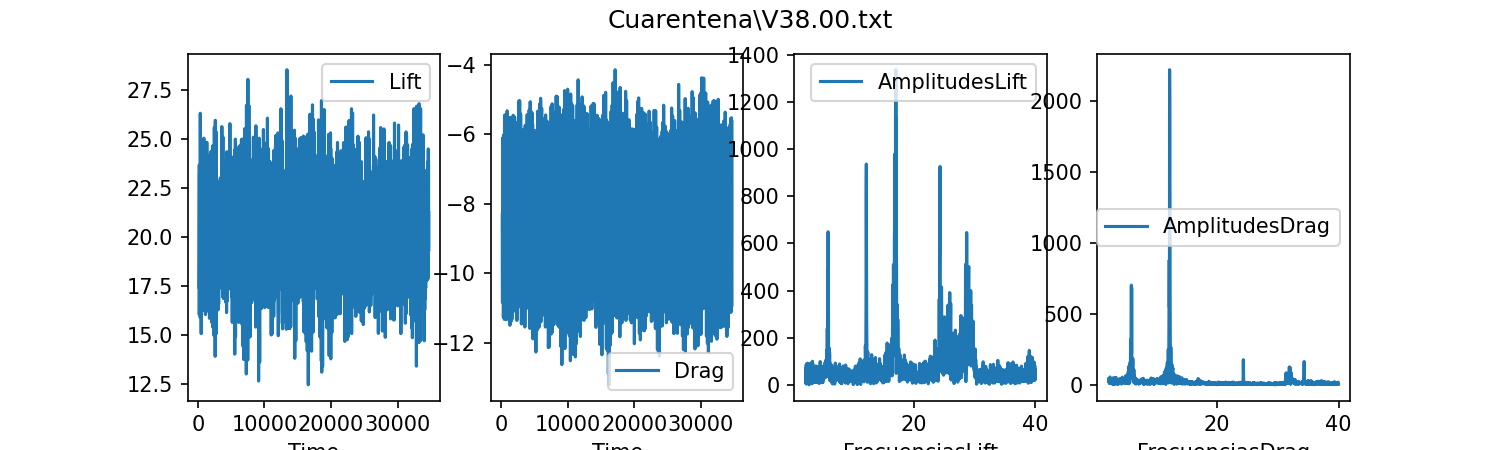

<IPython.core.display.Javascript object>


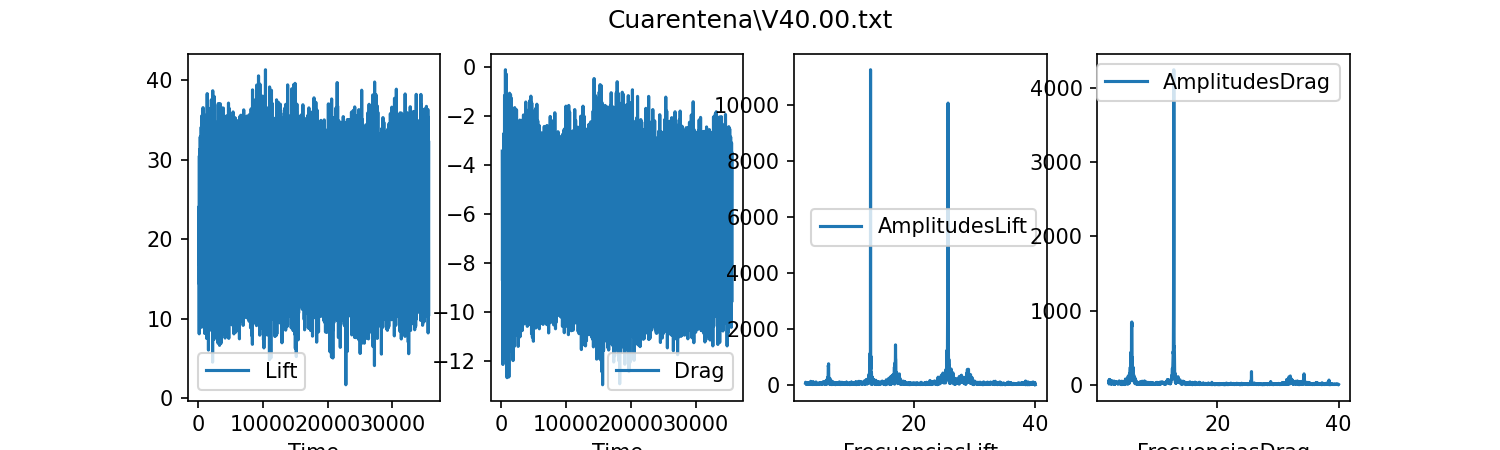

<IPython.core.display.Javascript object>


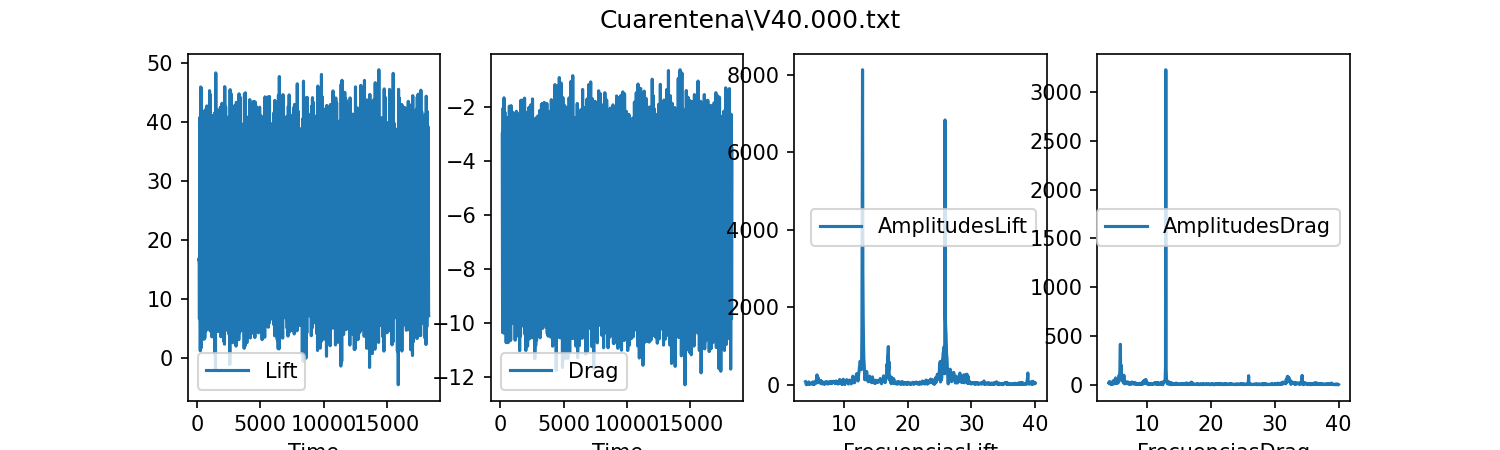

<IPython.core.display.Javascript object>


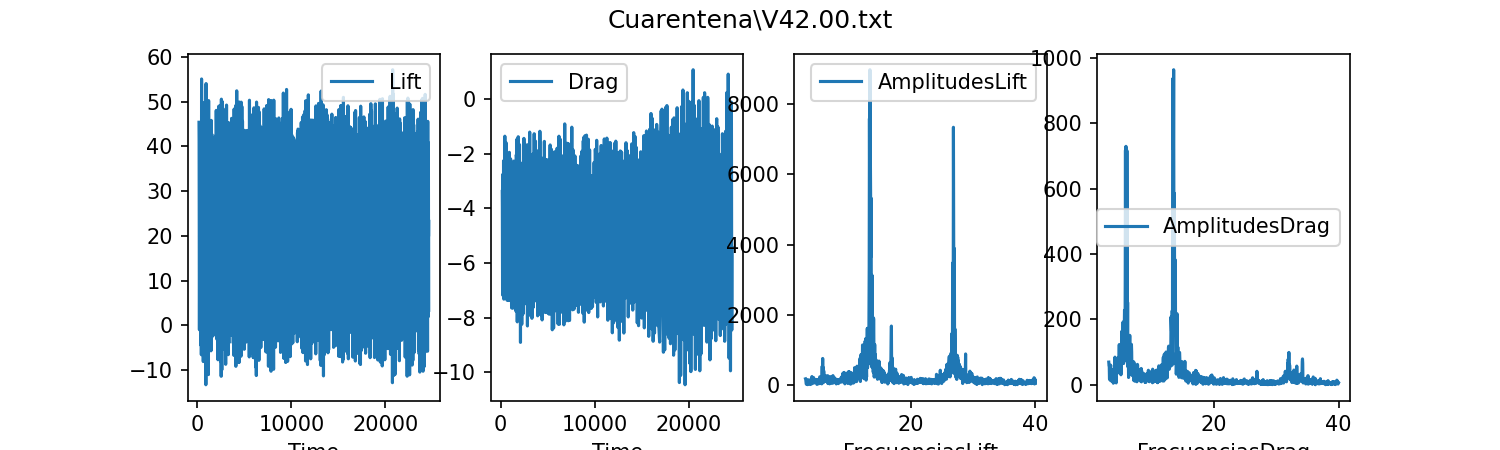

<IPython.core.display.Javascript object>


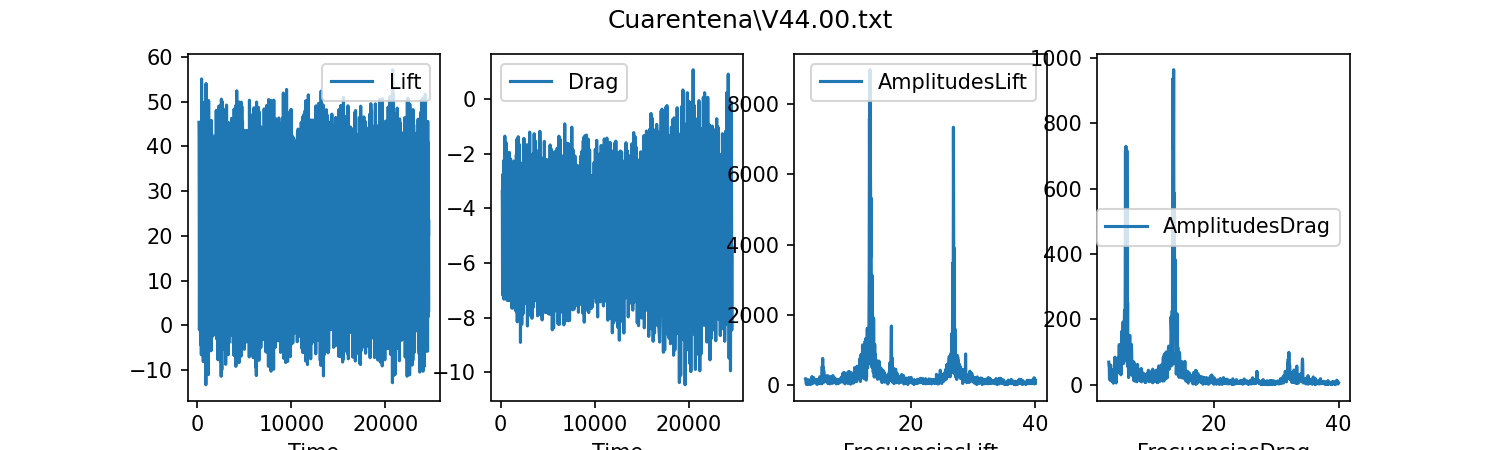

<IPython.core.display.Javascript object>


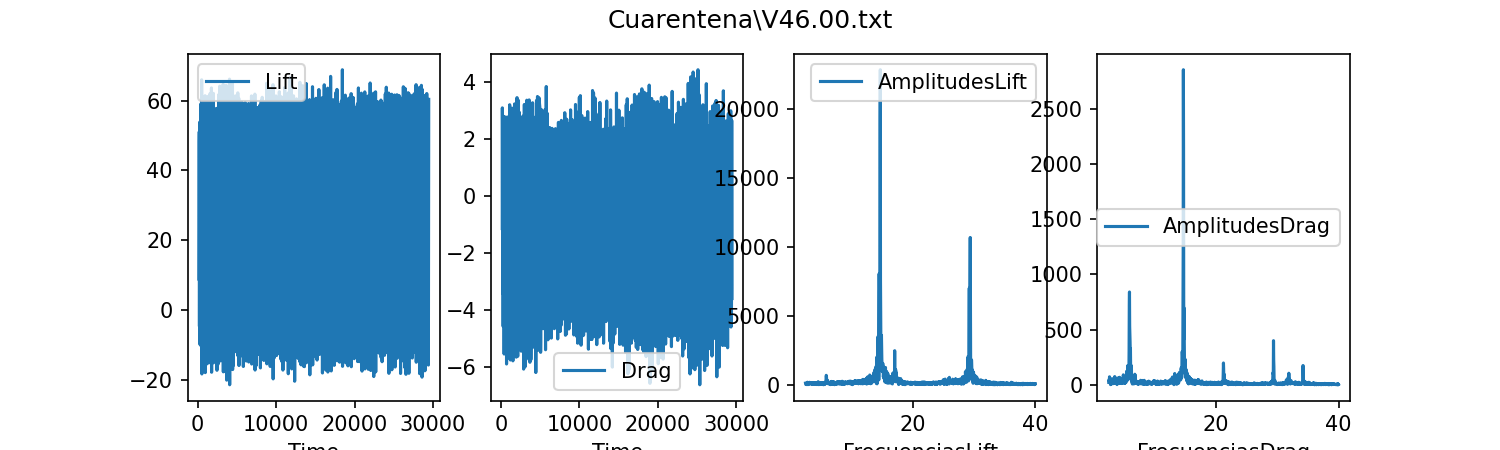

<IPython.core.display.Javascript object>


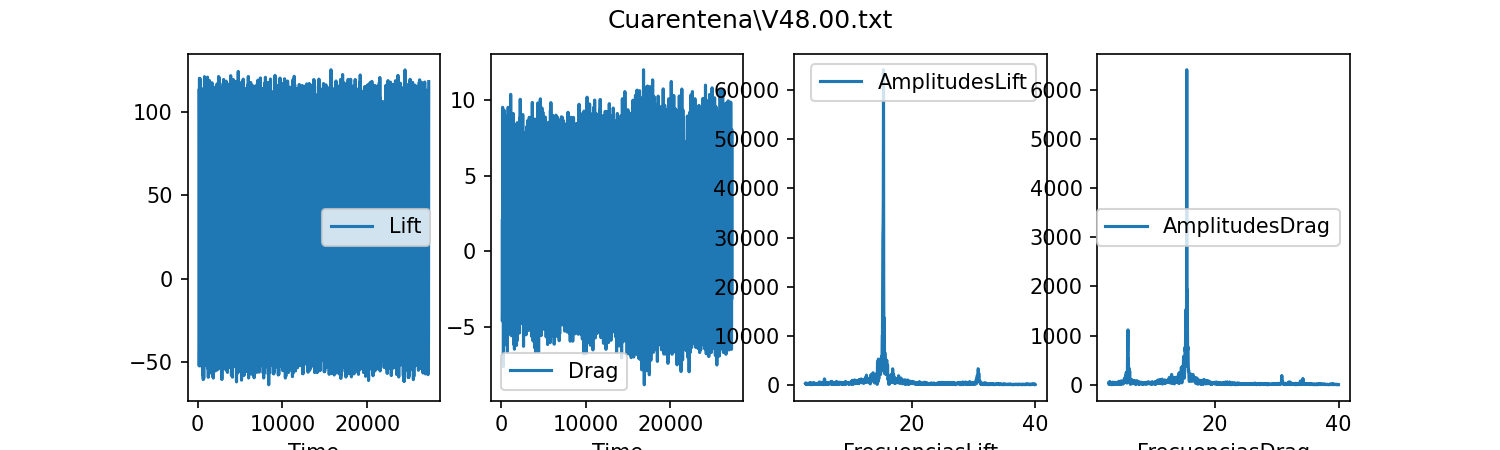

<IPython.core.display.Javascript object>


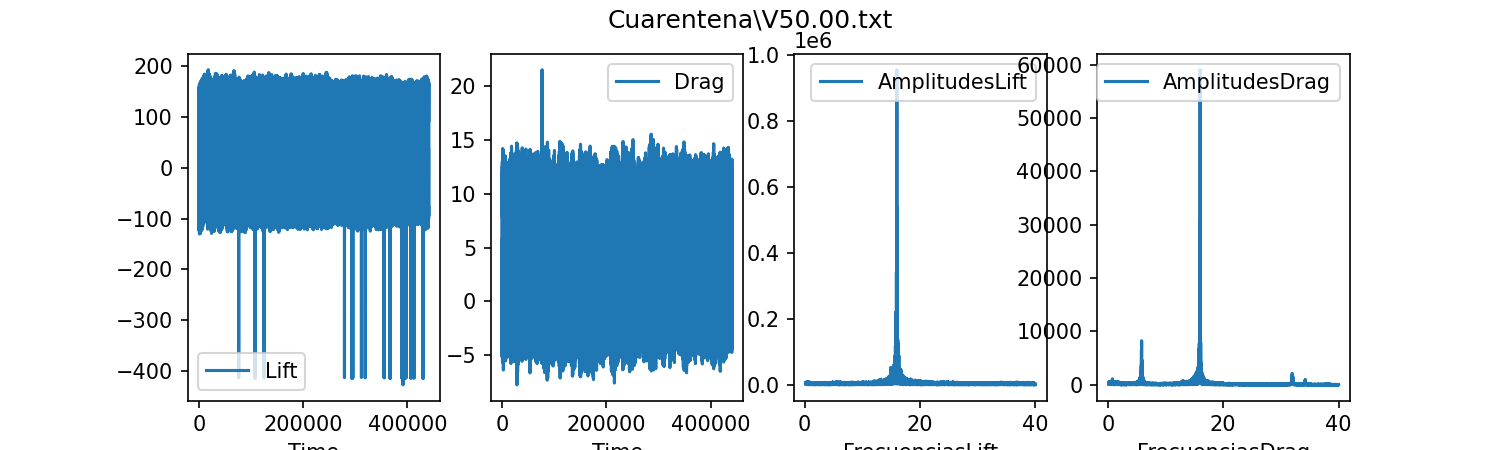

In [36]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-500]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+5*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-5*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+5*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-5*stdDrag):
            df["Drag"][i]=np.nan
            

    df.interpolate(method ='linear', limit_direction ='backward', inplace=True)
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    

    step=1/80
    nDrag=len(datos["Drag"].values)
    yfDrag=rfft(datos["Drag"].values)
    xfDrag= rfftfreq(nDrag,step)
    nLift=len(datos["Lift"].values)
    yfLift=rfft(datos["Lift"].values)
    xfLift= rfftfreq(nLift,step)
    
    dff=pd.DataFrame()
    dff["FrecuenciasDrag"]=xfDrag
    dff["AmplitudesDrag"]=np.abs(yfDrag)
    dff["FrecuenciasLift"]=xfLift
    dff["AmplitudesLift"]=np.abs(yfLift)
    dff=dff.iloc[80: ,:]

    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
    fig.suptitle(kk+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag))
    df.plot(ax=axes[0],x="Time", y="Lift")
    df.plot(ax=axes[1],x="Time", y="Drag")
    dff.plot(ax=axes[3],x="FrecuenciasDrag", y="AmplitudesDrag")
    dff.plot(ax=axes[2],x="FrecuenciasLift", y="AmplitudesLift")
    fig.savefig(k+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+".png", dpi=100)   
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(k+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    

<IPython.core.display.Javascript object>


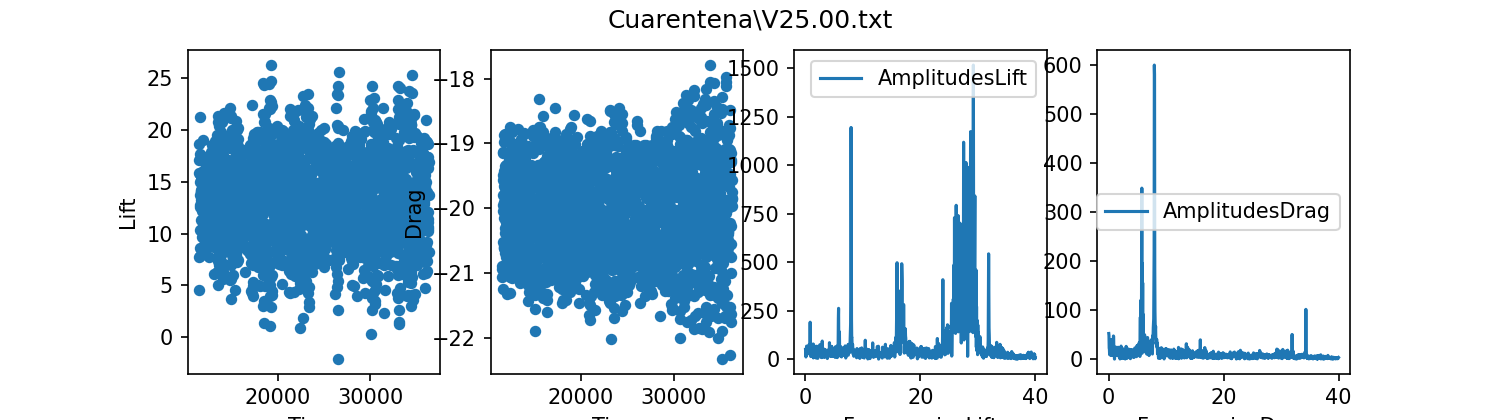

TypeError: bad operand type for unary +: 'str'

In [37]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=1000)
    datos = datos[:-500]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    

    step=1/80
    nDrag=len(datos["Drag"].values)
    yfDrag=rfft(datos["Drag"].values)
    xfDrag= rfftfreq(nDrag,step)
    nLift=len(datos["Lift"].values)
    yfLift=rfft(datos["Lift"].values)
    xfLift= rfftfreq(nLift,step)
    
    dff=pd.DataFrame()
    dff["FrecuenciasDrag"]=xfDrag
    dff["AmplitudesDrag"]=np.abs(yfDrag)
    dff["FrecuenciasLift"]=xfLift
    dff["AmplitudesLift"]=np.abs(yfLift)
    dff=dff.iloc[1: ,:]

    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,2.8))
    fig.suptitle(k)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    dff.plot(ax=axes[3],x="FrecuenciasDrag", y="AmplitudesDrag")
    dff.plot(ax=axes[2],x="FrecuenciasLift", y="AmplitudesLift")
    fig.savefig(k+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)++".png", dpi=100)   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(k+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    